In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.cluster import KMeans,AgglomerativeClustering

from sklearn.metrics import silhouette_score,silhouette_samples

from scipy.cluster.hierarchy import linkage,dendrogram



In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
df.info()  ## no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.describe(include = 'object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [8]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

#### Data Type Corrections

In [10]:
df.Revenue = df.Revenue.astype(str)

In [11]:
df.Weekend = df.Weekend.astype(str)

### Checking for balance of labels in Revenue as target

In [12]:
df.loc[df.Revenue=='True',['VisitorType','Revenue']].groupby('VisitorType')['Revenue'].count()

VisitorType
New_Visitor           422
Other                  16
Returning_Visitor    1470
Name: Revenue, dtype: int64

In [13]:
df.loc[df.Revenue=='True',['VisitorType','Revenue']].shape

(1908, 2)

In [14]:
df.loc[df.Revenue=='False',['VisitorType','Revenue']].shape

(10422, 2)

### Checking Distributions of Numerical Data

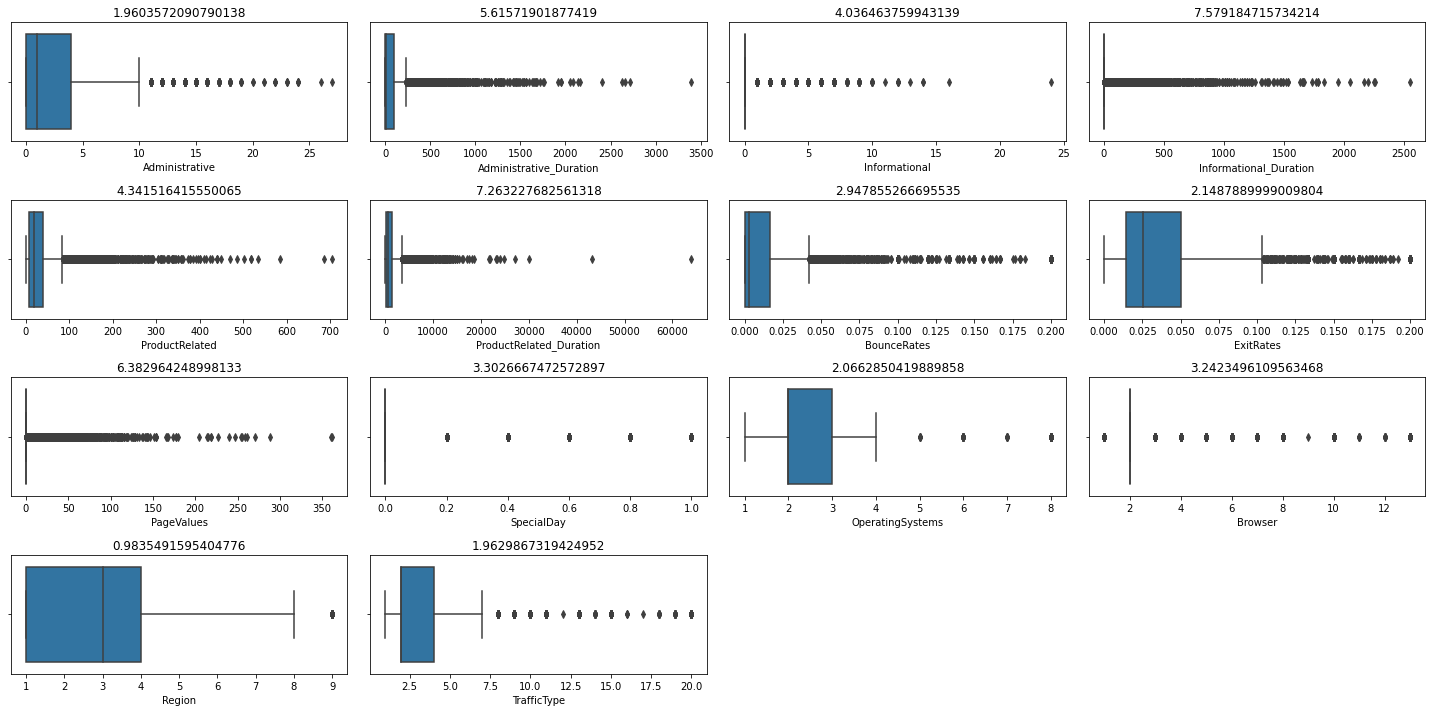

In [15]:
a = 4
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in df.select_dtypes(include = np.number).columns :
    plt.subplot(a,b,c)
    plt.title(df[i].skew())
    sns.boxplot(df[i])
    c+=1

plt.tight_layout()
plt.show()




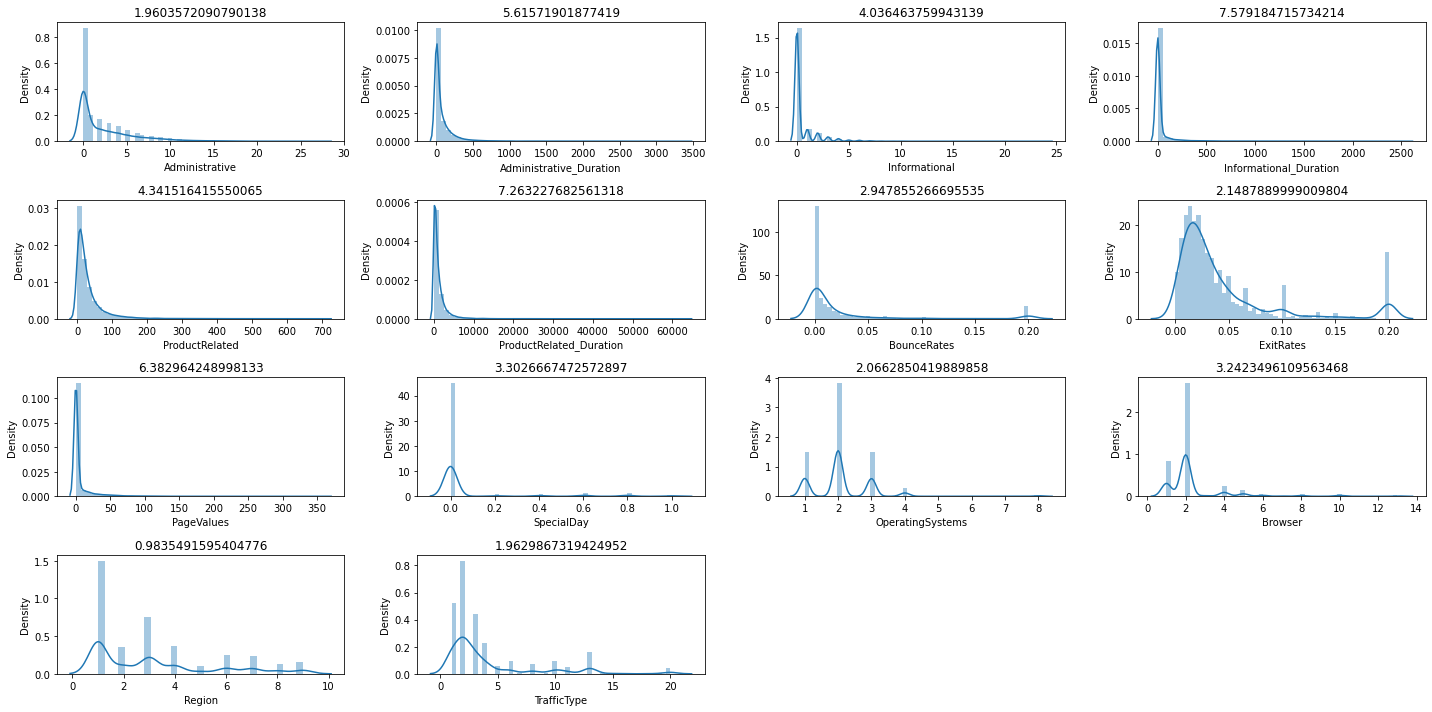

In [16]:
a = 4
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in df.select_dtypes(include = np.number).columns :
    plt.subplot(a,b,c)
    plt.title(df[i].skew())
    sns.distplot(df[i])
    c+=1

plt.tight_layout()
plt.show()




In [17]:
## Most num variables have upper edge outliers or can be said to be heavily right skewed.
## So we can use transformation techniques like Sc or PT.

### Using Power Transformations

In [18]:
pt = PowerTransformer()

x = pt.fit_transform(df.select_dtypes(include = np.number))

num_df = pd.DataFrame(x, columns = df.select_dtypes(include = np.number).columns)

num_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,-1.594583,-1.630444,-1.116671,-1.458641
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0.023949,0.100778,-1.116671,-0.386728
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,1.816290,-1.630444,1.658089,0.199041
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,1.065020,0.100778,-0.199574,0.574105
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1.065020,0.918635,-1.116671,0.574105


### Power Transformed distribution

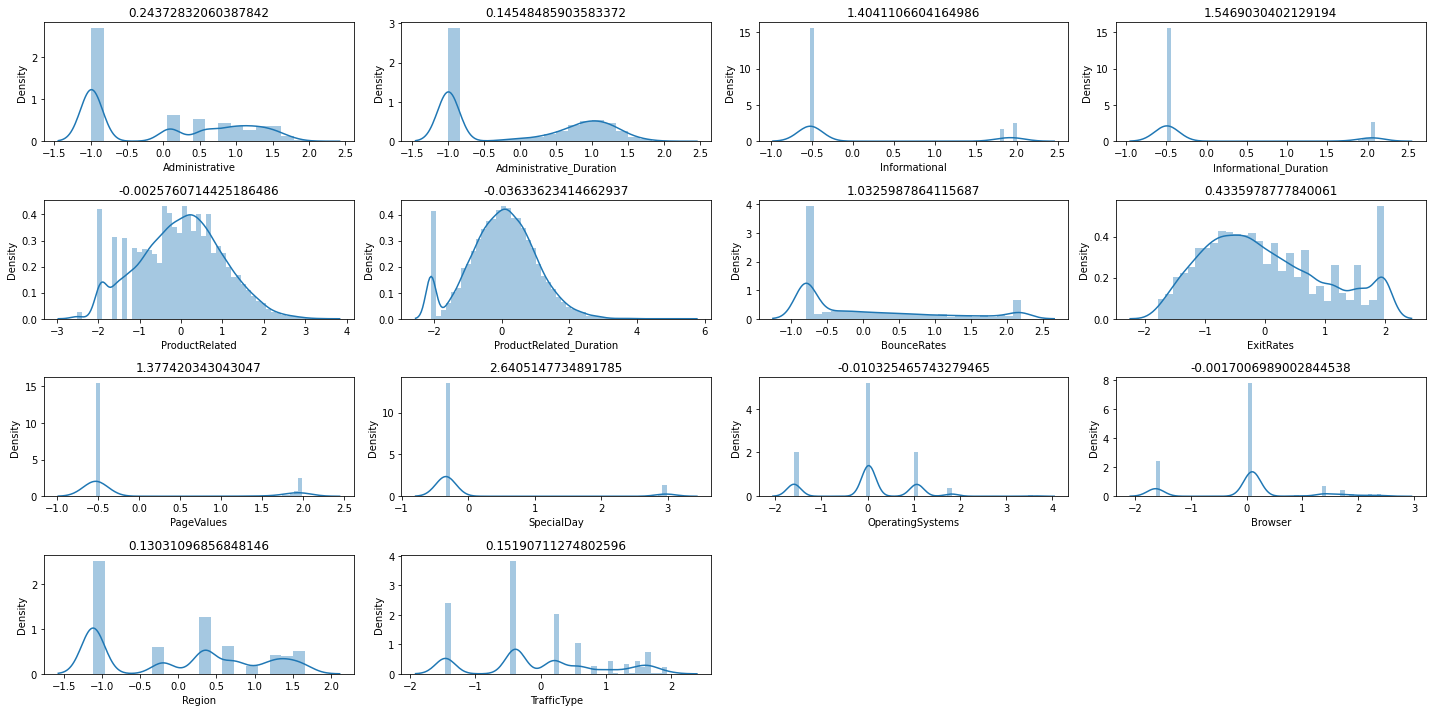

In [19]:
a = 4
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in num_df.columns :
    plt.subplot(a,b,c)
    plt.title(num_df[i].skew())
    sns.distplot(num_df[i])
    c+=1

plt.tight_layout()
plt.show()




### Checking Distributions for Categorical Data

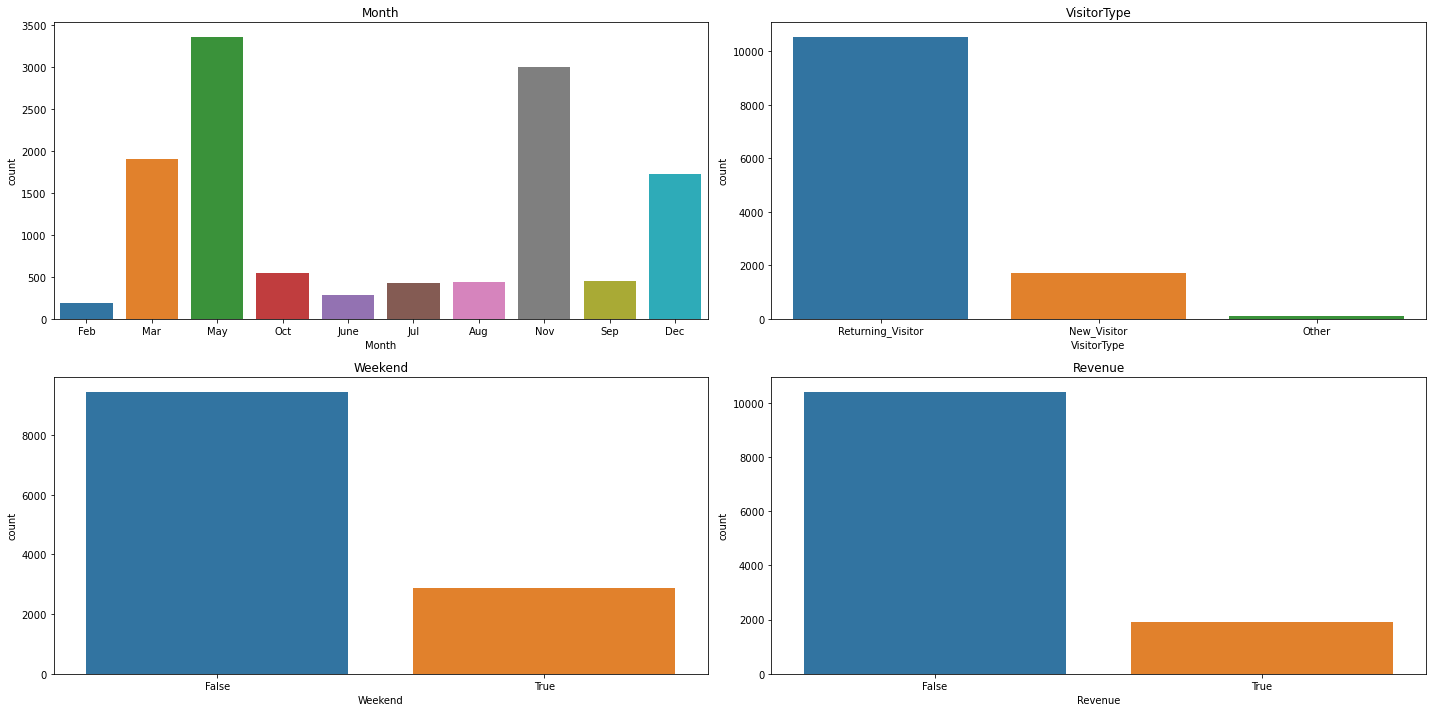

In [20]:
a = 2
b = 2
c = 1

plt.figure(figsize = [20,10])

for i in df.select_dtypes(include = 'object').columns :
    plt.subplot(a,b,c)
    plt.title(i)
    sns.countplot(df[i])
    c+=1

plt.tight_layout()
plt.show()




In [21]:
## Most Visitors in the month of May
## Returning Visitor type are the primary type of visitors to the site
## Most sessions happen on weekdays
## Most of the sessions don't contribute to Revenue

In [22]:
## Checking for Clarity in Visitor Type

df.loc[df.VisitorType=='New_Visitor','Revenue']

93       False
196       True
198       True
199       True
202      False
         ...  
12276     True
12296    False
12297    False
12317    False
12329    False
Name: Revenue, Length: 1694, dtype: object

### Encoding the Categorical features

In [23]:
x_weekend = [1 if x=='True' else 0 for x in df.Weekend]
x_Revenue = [1 if x=='True' else 0 for x in df.Revenue]

In [24]:
df_cat = df.loc[:,['Month','VisitorType']]

cat_encode = pd.get_dummies(df_cat, drop_first = True)

### Preparing Data

In [25]:
X = pd.concat([num_df,cat_encode], axis  = 1)

In [26]:
X.shape

(12330, 25)

In [27]:
X['Weekend'] = pd.Series(x_weekend)
X['Revenue'] = pd.Series(x_Revenue)

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,1,0


### Dropping Target Class Label of Reveue

In [28]:
X.drop('Revenue', axis = 1, inplace = True)

### Elbow Plot


In [29]:
cluster_range = np.arange(1,10)
cluster_errors = []

for i in cluster_range :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    pred = kmeans.labels_
    cluster_errors.append(kmeans.inertia_)
    

elbow = pd.DataFrame({'Num_Clusters':cluster_range,'Errors':cluster_errors})


In [30]:
elbow.head()

,Num_Clusters,Errors
0,1,186075.707461
1,2,149929.866920
2,3,130764.915395
3,4,119397.561743
4,5,111277.553006


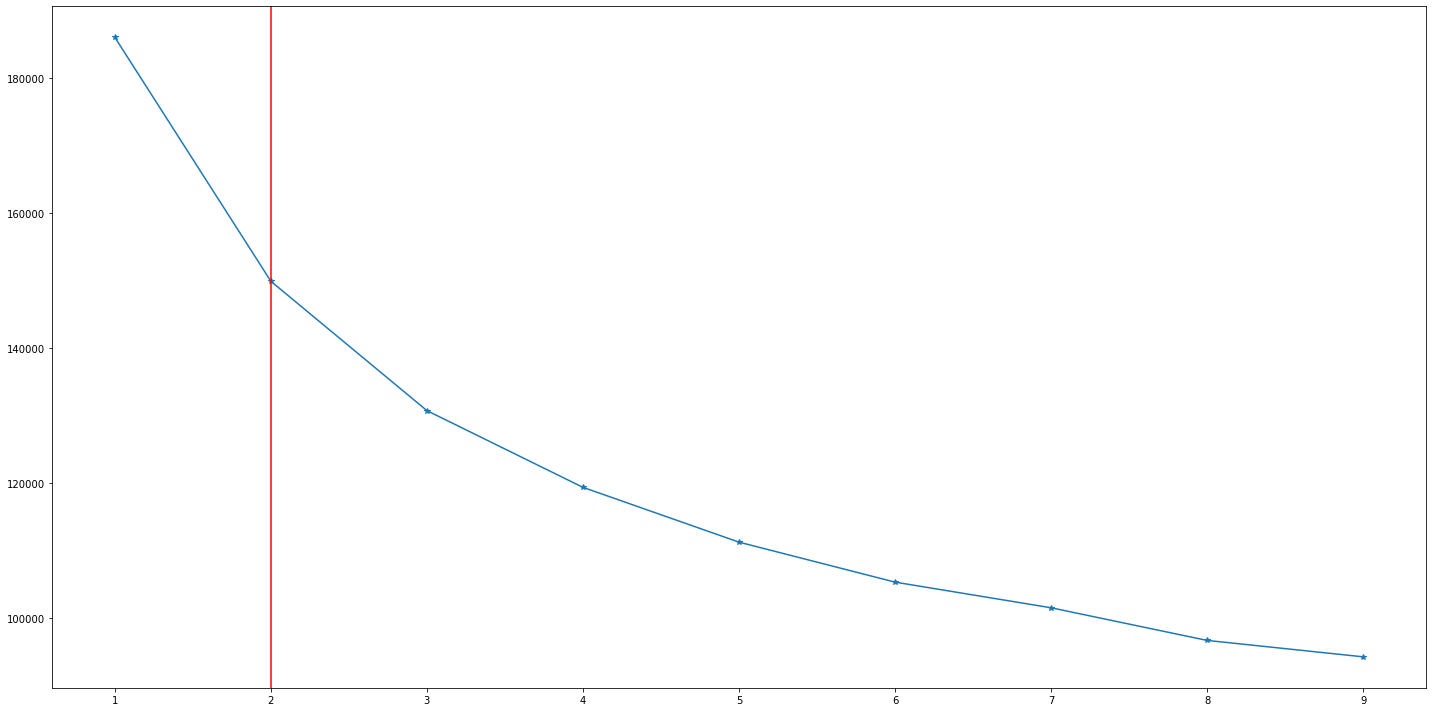

In [31]:
plt.figure(figsize = [20,10])
plt.plot(elbow.Num_Clusters,elbow.Errors, marker = '*')
plt.axvline(x = 2,color = 'r')
plt.tight_layout()
plt.show()

In [32]:
##Optimal number of clusters as per Elbow Plot is 2

### Silhoutte Scores

In [33]:
cluster_range = np.arange(2,10)
for i in cluster_range :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    pred = kmeans.labels_
    sil = silhouette_score(X,pred)
    print('For {} clusters the silhoutte score is {}'.format(i,sil))

For 2 clusters the silhoutte score is 0.17487747501748596
For 3 clusters the silhoutte score is 0.16755340885355421
For 4 clusters the silhoutte score is 0.15939158911895154
For 5 clusters the silhoutte score is 0.16830418907484826
For 6 clusters the silhoutte score is 0.16708519778924094
For 7 clusters the silhoutte score is 0.15852884808682133
For 8 clusters the silhoutte score is 0.15682572831505096
For 9 clusters the silhoutte score is 0.14157626685775024


In [34]:
## The silhoutte score also gives the best value for n_clusters = 2

### K-Means Clustering

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
X['K-Group'] = kmeans.labels_

<AxesSubplot:>

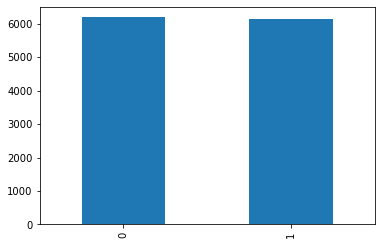

In [36]:
X['K-Group'].value_counts().plot(kind = 'bar')

### Agglomerative Clustering

In [37]:
ag = AgglomerativeClustering(n_clusters=2,linkage='ward')
ag.fit(x)

X['Ag-Group'] = ag.labels_

<AxesSubplot:>

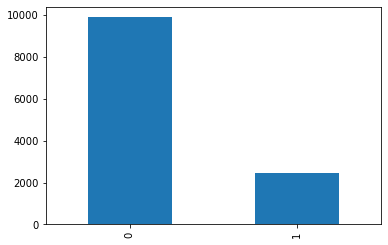

In [38]:
X['Ag-Group'].value_counts().plot(kind = 'bar')

In [39]:
## Agglomerative Clustering seems more meaningful in discovering inherent patterns as seen in the Revenue class.

### Confusion matrix for Classification Analogy

In [40]:
X['Revenue'] = df.Revenue

In [41]:
x_Revenue = [1 if x=='True' else 0 for x in df.Revenue]
X['Revenue'] = pd.Series(x_Revenue)

In [42]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,K-Group,Ag-Group,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,1,0,1,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,...,0,0,0,0,0,1,0,1,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,1,0,1,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,...,0,0,0,0,0,1,0,1,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,...,0,0,0,0,0,1,1,1,0,0


In [43]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [44]:
def confmx(df,i) :
    cm = confusion_matrix(df['Revenue'],df[i])
    conf_matrix = pd.DataFrame(cm, columns = ['Predicted 0','Predicted 1'], index = ['Actual 0','Actual 1'])
    sns.heatmap(conf_matrix,annot = True, fmt = 'd', cmap = ListedColormap(['Lightskyblue']), cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()


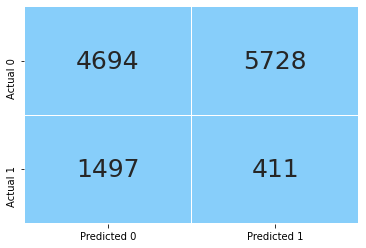

In [45]:
confmx(X,'K-Group')

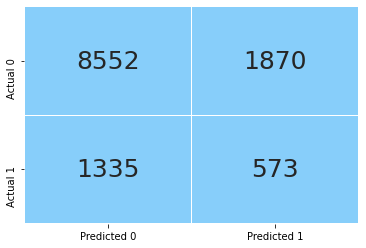

In [46]:
confmx(X,'Ag-Group')

### We see a 10.8% drop in False Negatives and a 67.3 % drop in False Positives in Agglomerative Clustering to K-Means

### In such transactions false negatives are more dangerous as they lead to revenue loss, and false positve holds critical sense for elite and high revenue customers.

### Dendogram

In [47]:
X_new = X.drop('Revenue', axis = 1)

In [48]:
link_mat = linkage(X_new,'ward')

print(link_mat[0:10])

[[2.5200e+02 1.0230e+03 0.0000e+00 2.0000e+00]
 [1.3560e+03 1.2330e+04 0.0000e+00 3.0000e+00]
 [9.7150e+03 1.0222e+04 0.0000e+00 2.0000e+00]
 [8.5000e+01 1.5800e+02 0.0000e+00 2.0000e+00]
 [2.9480e+03 3.2720e+03 0.0000e+00 2.0000e+00]
 [5.3550e+03 1.2334e+04 0.0000e+00 3.0000e+00]
 [2.1750e+03 2.2350e+03 0.0000e+00 2.0000e+00]
 [3.7210e+03 1.2336e+04 0.0000e+00 3.0000e+00]
 [4.1630e+03 1.2337e+04 0.0000e+00 4.0000e+00]
 [2.0970e+03 2.6210e+03 0.0000e+00 2.0000e+00]]


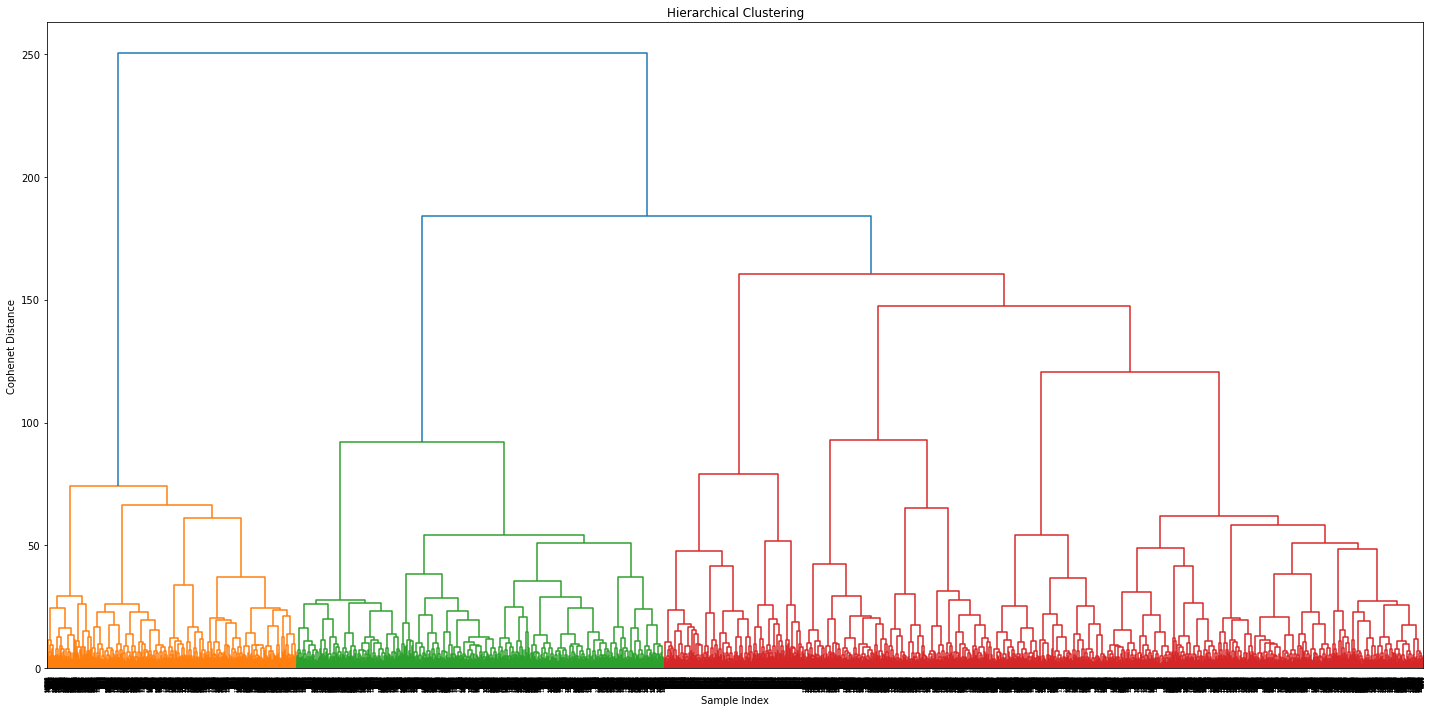

In [49]:
plt.figure(figsize = [20,10])
plt.title('Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Cophenet Distance')
dendrogram(link_mat)
plt.tight_layout()
plt.show()

## Applying PCA

#### Deciding hyperparameter n_compnents 

In [50]:
cov_mat = np.cov(X_new.T)
print(cov_mat[0:5])

[[ 1.00008111e+00  9.54709470e-01  3.57895347e-01  3.53451301e-01
   4.59429551e-01  4.27474682e-01 -2.70803875e-01 -4.52694192e-01
   3.33858325e-01 -1.25984457e-01 -6.61462059e-03 -1.04913213e-02
   1.06254670e-02 -1.02125115e-03 -5.79090014e-03 -1.05386825e-02
   2.79336086e-03 -1.24114275e-03 -1.61384062e-02 -3.24685686e-02
   1.41570812e-02  2.31720042e-02  1.52814897e-02 -1.97919381e-03
  -3.57719069e-02  1.72403861e-02 -3.99758543e-01  1.42226993e-01]
 [ 9.54709470e-01  1.00008111e+00  3.40442099e-01  3.36334247e-01
   4.33305609e-01  4.17958092e-01 -2.79594687e-01 -4.64214249e-01
   3.23471875e-01 -1.32368022e-01 -1.37448437e-02 -1.77597642e-02
   1.78417478e-02 -2.50507454e-03 -3.67798597e-03 -1.10605876e-02
   2.67828167e-03 -2.44388543e-03 -1.54789561e-02 -3.18566315e-02
   1.10740042e-02  2.44302898e-02  1.52977954e-02 -1.95180528e-03
  -4.44536970e-02  1.78356107e-02 -4.05389775e-01  1.35873923e-01]
 [ 3.57895347e-01  3.40442099e-01  1.00008111e+00  9.48165692e-01
   3.706

In [51]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

print('Eigen Values ','\n','\n',eig_val,'\n')
print('Eigen Vector','\n',eig_vec,'\n')

Eigen Values  
 
 [4.51685504e+00 1.67722242e+00 1.46726248e+00 1.16198346e+00
 1.12821736e+00 9.85130623e-01 9.78811894e-01 8.30850349e-01
 7.55594066e-01 5.58616105e-01 2.26254457e-01 2.03740738e-01
 1.75851970e-01 1.55439698e-01 1.48095425e-01 1.02072962e-01
 8.44884737e-02 6.22760063e-02 5.97131303e-02 5.26448431e-02
 4.17089630e-02 4.03309859e-02 3.53116714e-02 2.51960476e-02
 1.54656188e-02 6.05918461e-03 2.71252757e-03 3.52182031e-03] 

Eigen Vector 
 [[ 3.65883192e-01  4.73546617e-02  8.44241964e-02 -4.27286146e-01
   2.63975715e-01  1.38421925e-01 -1.49848525e-01  1.47713486e-01
   7.55362973e-02 -2.42497776e-02 -9.19162971e-02  7.74418257e-03
  -1.27412106e-02 -4.55913728e-03 -1.29056221e-02 -1.02176589e-01
  -7.18153382e-02 -8.01411781e-02 -3.30217249e-01  6.53663150e-02
  -5.68583969e-01 -2.55828906e-01  3.70015518e-02  1.96546954e-02
  -7.94308663e-03 -3.02527402e-03 -3.86604989e-03 -1.16660883e-03]
 [ 3.61615342e-01  6.27400762e-02  9.63168993e-02 -4.40872767e-01
   2.626

In [52]:
eig_val = list(eig_val)

eig_val.sort(reverse = True)
print(eig_val)  ### As per Kaiser Criterion 5 PCs should be taken into consideration.

[4.516855039348107, 1.677222420298589, 1.4672624846686484, 1.1619834566901834, 1.128217358368776, 0.9851306234955787, 0.9788118938474472, 0.8308503485467965, 0.7555940657591912, 0.5586161046271519, 0.2262544572750825, 0.2037407381406396, 0.1758519703819739, 0.15543969793277795, 0.1480954245188408, 0.10207296152981161, 0.08448847371427727, 0.062276006261669174, 0.05971313027644415, 0.052644843136139124, 0.041708962972654126, 0.04033098593219894, 0.0353116713848677, 0.025196047616245363, 0.015465618762667884, 0.006059184607963478, 0.003521820313525725, 0.0027125275705156674]


In [53]:
percent_var = []

for i in eig_val :
    percent_var.append((i/sum(eig_val))*100)
    
cum_var = np.cumsum(percent_var)
cum_var
    

array([ 29.13831517,  39.95810794,  49.42344529,  56.919422  ,
        64.19757299,  70.55266882,  76.8670024 ,  82.22683332,
        87.10118458,  90.70482737,  92.16439905,  93.47873431,
        94.61315861,  95.61590297,  96.57126928,  97.22974384,
        97.77478054,  98.17652421,  98.56173471,  98.90134757,
        99.17041286,  99.43058879,  99.65838504,  99.8209252 ,
        99.9206942 ,  99.95978211,  99.98250143, 100.        ])

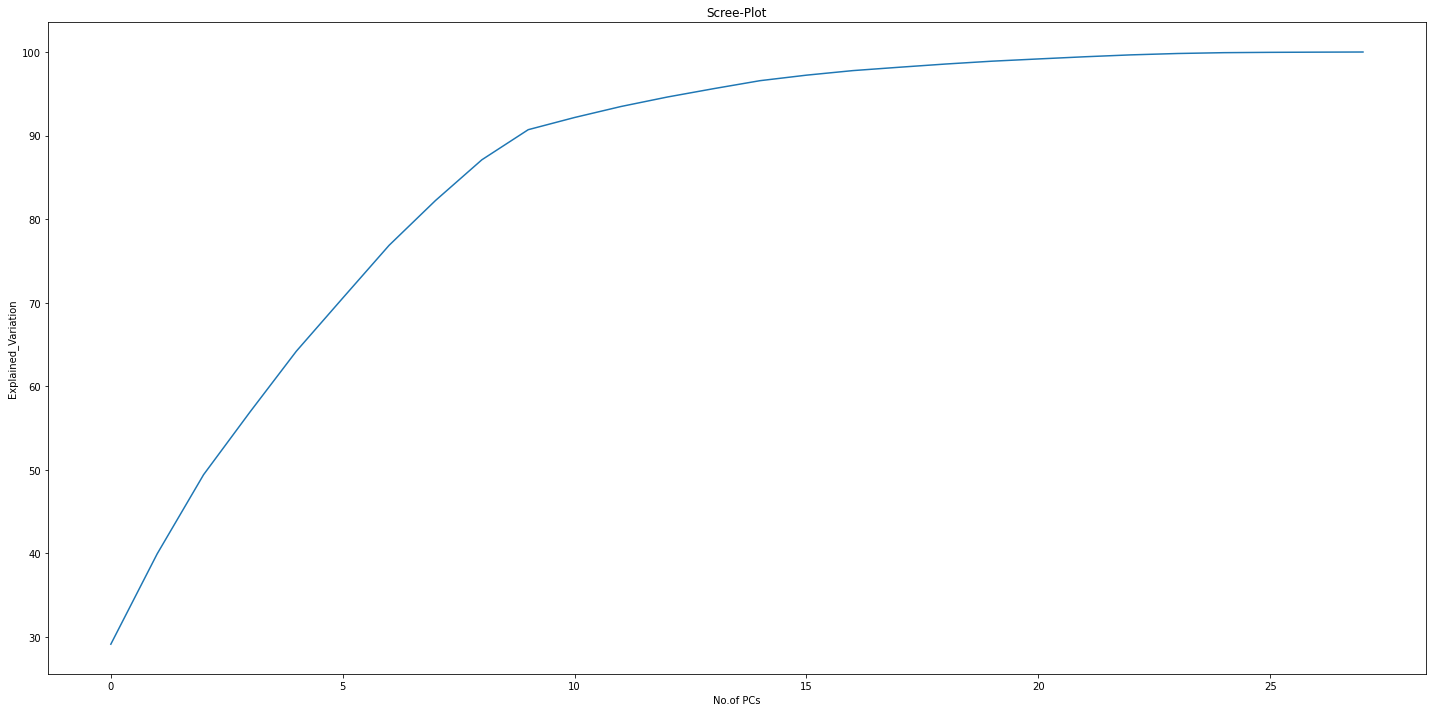

In [54]:
plt.figure(figsize = [20,10])
plt.plot(cum_var)
plt.title('Scree-Plot')
plt.xlabel('No.of PCs')
plt.ylabel('Explained_Variation')
plt.tight_layout()
plt.show()

In [55]:
## Scree plot demands more than 5 PCs say like 8 PCS explain almost 80% variation.

In [56]:
## But in subsequent observation, it's noticed that 5 and 8 PCs still give the same 2 clusters, so we can move with 2 PCS and try clustering

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_new)

X_PC = pd.DataFrame(x_pca, columns = ['PC1','PC2'])
X_PC.head()

,PC1,PC2
0,-3.912298,1.804125
1,-2.558361,0.015087
2,-3.945220,1.456820
3,-3.554946,1.103393
4,-1.804047,0.003649


### Elbow n Silhoutte

In [58]:
cluster_range = np.arange(1,10)
cluster_errors = []

for i in cluster_range :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_PC)
    pred = kmeans.labels_
    cluster_errors.append(kmeans.inertia_)
    

elbow = pd.DataFrame({'Num_Clusters':cluster_range,'Errors':cluster_errors})
elbow.head()

,Num_Clusters,Errors
0,1,76366.781000
1,2,37977.688048
2,3,18635.273440
3,4,12022.959509
4,5,9339.851381


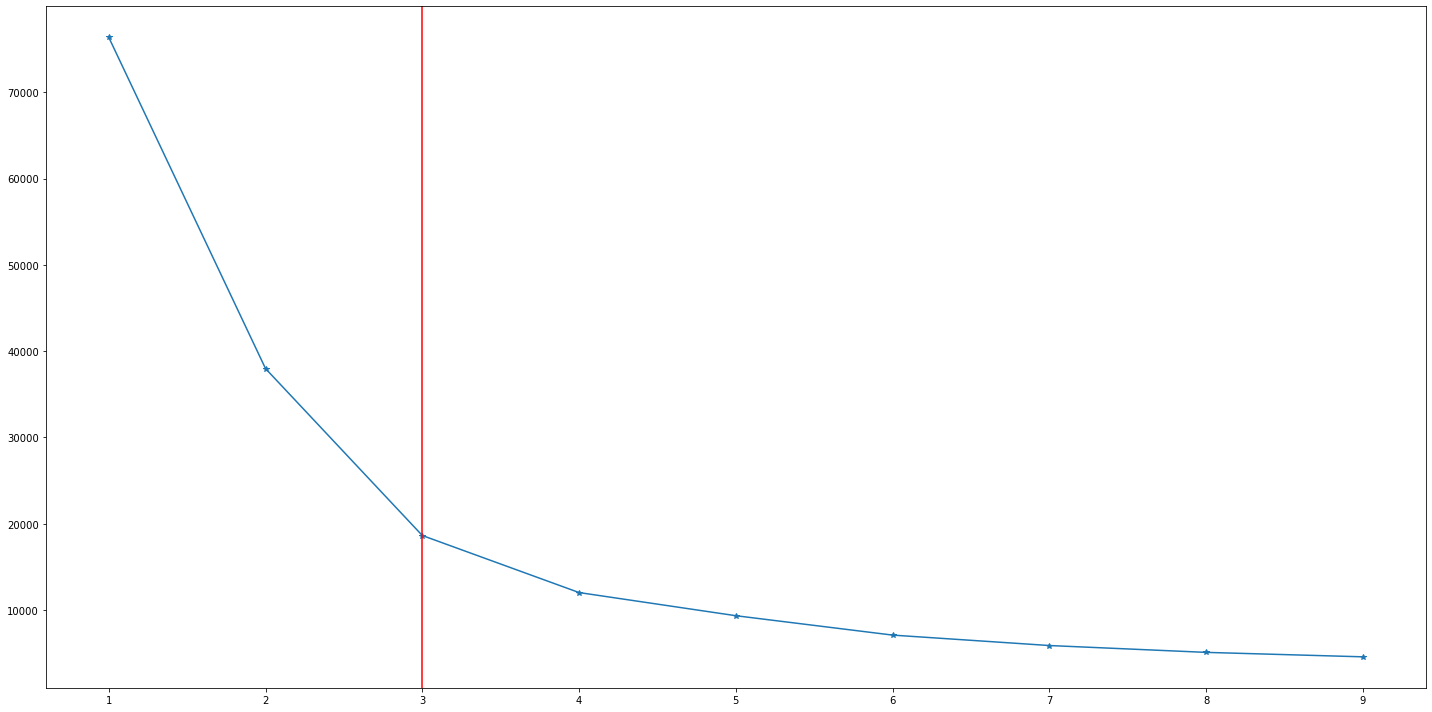

In [59]:
plt.figure(figsize = [20,10])
plt.plot(elbow.Num_Clusters,elbow.Errors, marker = '*')
plt.axvline(x = 3, color = 'r')
plt.tight_layout()
plt.show()

In [60]:
## 3 optimal K-means cluster as per elbow plot after applying PCA

In [61]:
cluster_range = np.arange(2,10)
for i in cluster_range :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_PC)
    pred = kmeans.labels_
    sil = silhouette_score(X_PC,pred)
    print('For {} clusters the silhoutte score is {}'.format(i,sil))

For 2 clusters the silhoutte score is 0.4467423985294997
For 3 clusters the silhoutte score is 0.5190587011772452
For 4 clusters the silhoutte score is 0.5079102985269645
For 5 clusters the silhoutte score is 0.4923793333423872
For 6 clusters the silhoutte score is 0.44976851289317943
For 7 clusters the silhoutte score is 0.4320552017949182
For 8 clusters the silhoutte score is 0.4233041365903791
For 9 clusters the silhoutte score is 0.39008599543593864


In [62]:
## For 5 PCs

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_pca = pca.fit_transform(X_new)

X_PC5 = pd.DataFrame(x_pca, columns = ['PC1','PC2','PC3','PC4','PC5'])
X_PC5.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.912298,1.804125,-2.582330,-0.489939,-0.573470
1,-2.558361,0.015088,-0.266783,-0.035615,-0.876797
2,-3.945220,1.456821,0.275630,-1.897681,-0.033874
3,-3.554946,1.103395,0.762136,-1.181267,0.006881
4,-1.804047,0.003647,1.348020,0.409336,-0.289222


In [63]:
cluster_range = np.arange(2,10)
for i in cluster_range :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_PC5)
    pred = kmeans.labels_
    sil = silhouette_score(X_PC5,pred)
    print('For {} clusters the silhoutte score is {}'.format(i,sil))

For 2 clusters the silhoutte score is 0.29197506279361723
For 3 clusters the silhoutte score is 0.29823673971182535
For 4 clusters the silhoutte score is 0.289252381468106
For 5 clusters the silhoutte score is 0.302375675049018
For 6 clusters the silhoutte score is 0.3160770307384817
For 7 clusters the silhoutte score is 0.29825567609597814
For 8 clusters the silhoutte score is 0.3012132641386083
For 9 clusters the silhoutte score is 0.283884336031917


### We observe that silhoutte score is best for 2 PCs and 3 clusters

### K-Means post PCA

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_PC)
X['PCA-KMeans'] = kmeans.labels_

<AxesSubplot:>

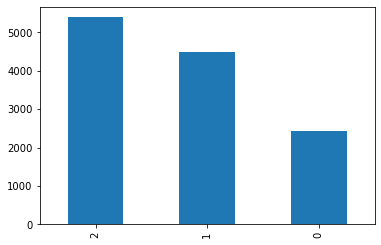

In [65]:
X['PCA-KMeans'].value_counts().plot(kind = 'bar')

### Agglomerative Clustering post PCA

In [66]:
ag = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')
ag.fit(X_PC)
X['PCA-Ag'] = ag.labels_

<AxesSubplot:>

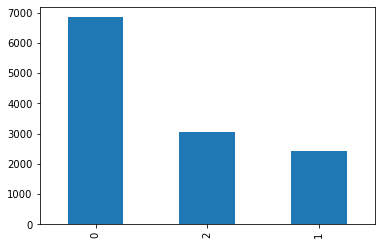

In [67]:
X['PCA-Ag'].value_counts().plot(kind = 'bar')

### Dendogram post PCA

In [68]:
link_mat = linkage(X_PC,'ward')

print(link_mat[0:10])

[[5.9100e+02 7.2000e+02 0.0000e+00 2.0000e+00]
 [1.3250e+03 1.2330e+04 0.0000e+00 3.0000e+00]
 [8.5000e+01 1.5800e+02 0.0000e+00 2.0000e+00]
 [2.0970e+03 2.6210e+03 0.0000e+00 2.0000e+00]
 [3.2810e+03 1.2333e+04 0.0000e+00 3.0000e+00]
 [3.6630e+03 1.2334e+04 0.0000e+00 4.0000e+00]
 [4.1820e+03 1.2335e+04 0.0000e+00 5.0000e+00]
 [4.4630e+03 1.2336e+04 0.0000e+00 6.0000e+00]
 [1.3320e+03 1.5150e+03 0.0000e+00 2.0000e+00]
 [1.1110e+04 1.2159e+04 0.0000e+00 2.0000e+00]]


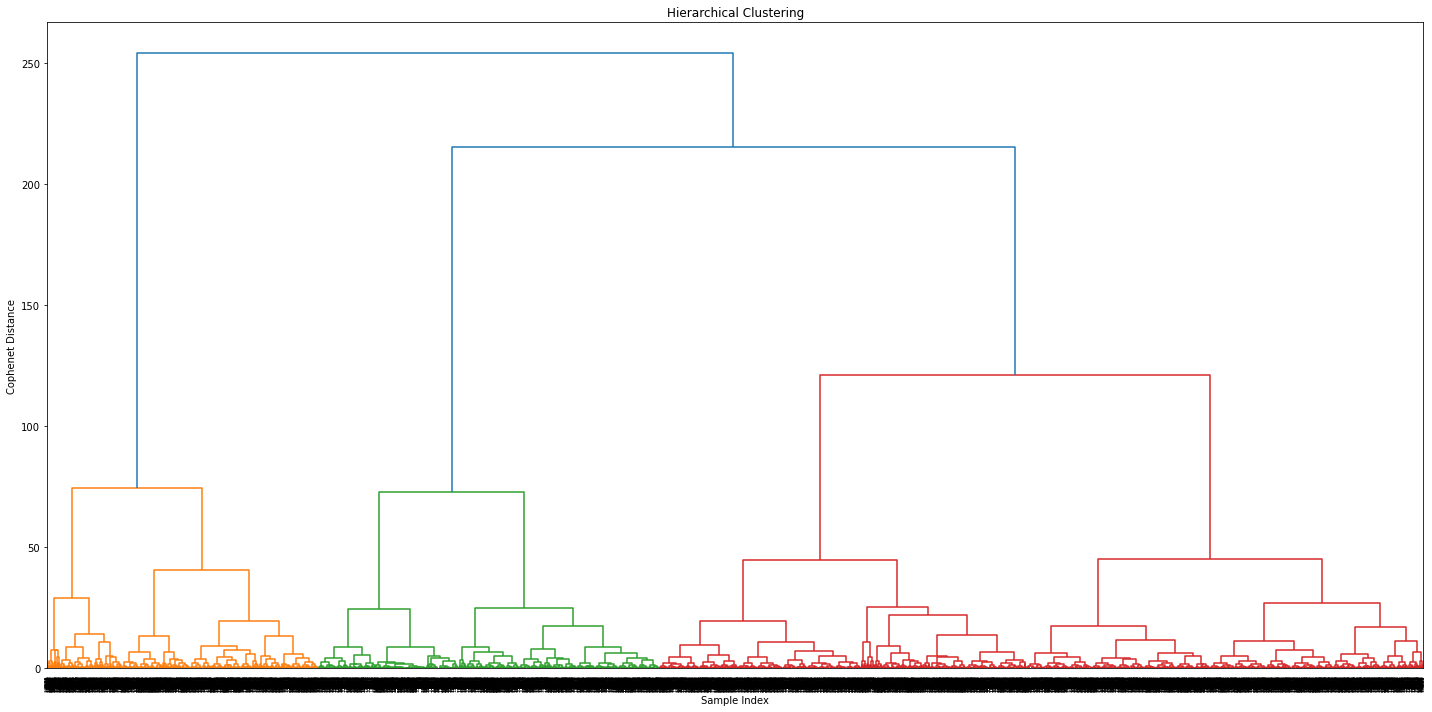

In [69]:
plt.figure(figsize = [20,10])
plt.title('Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Cophenet Distance')
dendrogram(link_mat)
plt.tight_layout()
plt.show()

### After applying PCA and Building Dendograms via Ward Linkages, we see better set of clusters

In [70]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,K-Group,Ag-Group,Revenue,PCA-KMeans,PCA-Ag
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,1,0,1,0,0,1,2
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,...,0,0,0,1,0,1,0,0,1,2
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,1,0,1,0,0,1,2
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,...,0,0,0,1,0,1,0,0,1,2
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,...,0,0,0,1,1,1,0,0,1,2


In [75]:
X['K-Group'].value_counts()

0    6191
1    6139
Name: K-Group, dtype: int64

In [77]:
X['Ag-Group'].value_counts()

0    9887
1    2443
Name: Ag-Group, dtype: int64

In [78]:
X['PCA-KMeans'].value_counts()

2    5389
1    4498
0    2443
Name: PCA-KMeans, dtype: int64

In [79]:
X['PCA-Ag'].value_counts()

0    6847
2    3051
1    2432
Name: PCA-Ag, dtype: int64

In [91]:
x_weekend = [1 if x=='True' else 0 for x in df.Weekend]
x_Revenue = [1 if x=='True' else 0 for x in df.Revenue]

df['Weekend'] = pd.Series(x_weekend)
df['Revenue'] = pd.Series(x_Revenue)

In [92]:
df['K-Group'] = X['K-Group']
df['Ag-Group'] = X['Ag-Group']
df['PCA-KMeans'] = X['PCA-KMeans']
df['PCA-Ag'] = X['PCA-Ag']

In [93]:
df.shape

(12330, 22)

array([[<AxesSubplot:title={'center':'Administrative'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'Administrative_Duration'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'Ag-Group'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'BounceRates'}, xlabel='[K-Group]'>],
       [<AxesSubplot:title={'center':'Browser'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'ExitRates'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'Informational'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'Informational_Duration'}, xlabel='[K-Group]'>],
       [<AxesSubplot:title={'center':'OperatingSystems'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'PCA-Ag'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'PCA-KMeans'}, xlabel='[K-Group]'>,
        <AxesSubplot:title={'center':'PageValues'}, xlabel='[K-Group]'>],
       [<AxesSubplot:title={'center':'ProductRelated'}, xlabel='[K-Group]'>,
        <AxesSu

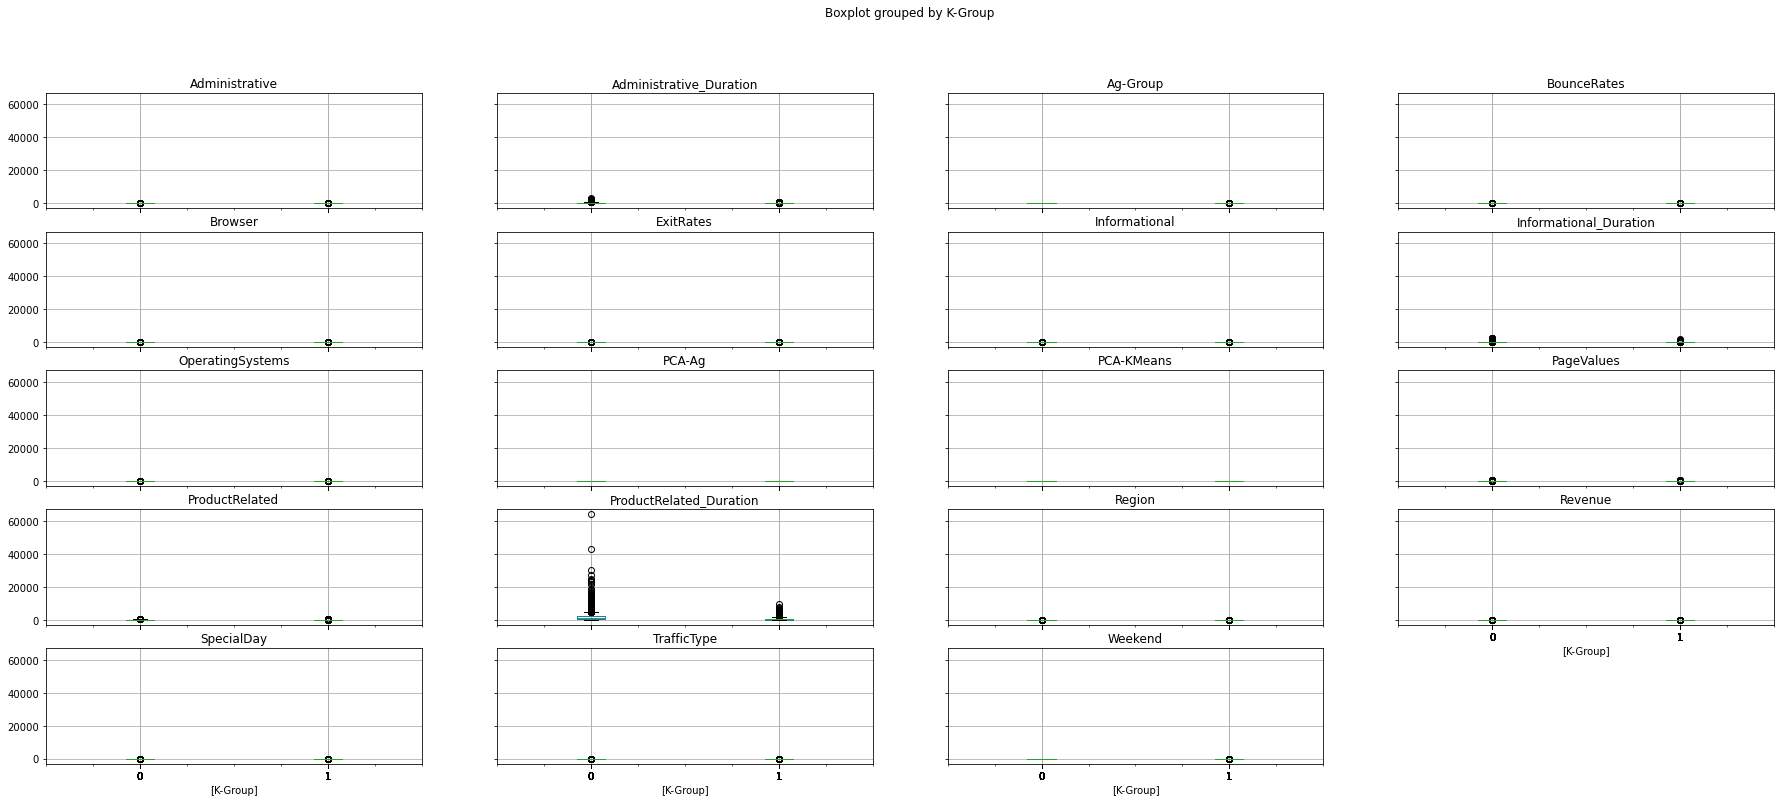

In [94]:
df.boxplot(by  = 'K-Group', layout = (6,4), figsize = [30,15])

In [85]:
# 2 Clusters formed most dominantly on ProductRelated Duration,one segment has higher value in the mentioned parameter than the other one.

array([[<AxesSubplot:title={'center':'Administrative'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'Administrative_Duration'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'BounceRates'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'Browser'}, xlabel='[Ag-Group]'>],
       [<AxesSubplot:title={'center':'ExitRates'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'Informational'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'Informational_Duration'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'K-Group'}, xlabel='[Ag-Group]'>],
       [<AxesSubplot:title={'center':'OperatingSystems'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'PCA-Ag'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'PCA-KMeans'}, xlabel='[Ag-Group]'>,
        <AxesSubplot:title={'center':'PageValues'}, xlabel='[Ag-Group]'>],
       [<AxesSubplot:title={'center':'ProductRelated'}, xlabel='[Ag-Group]'>,
   

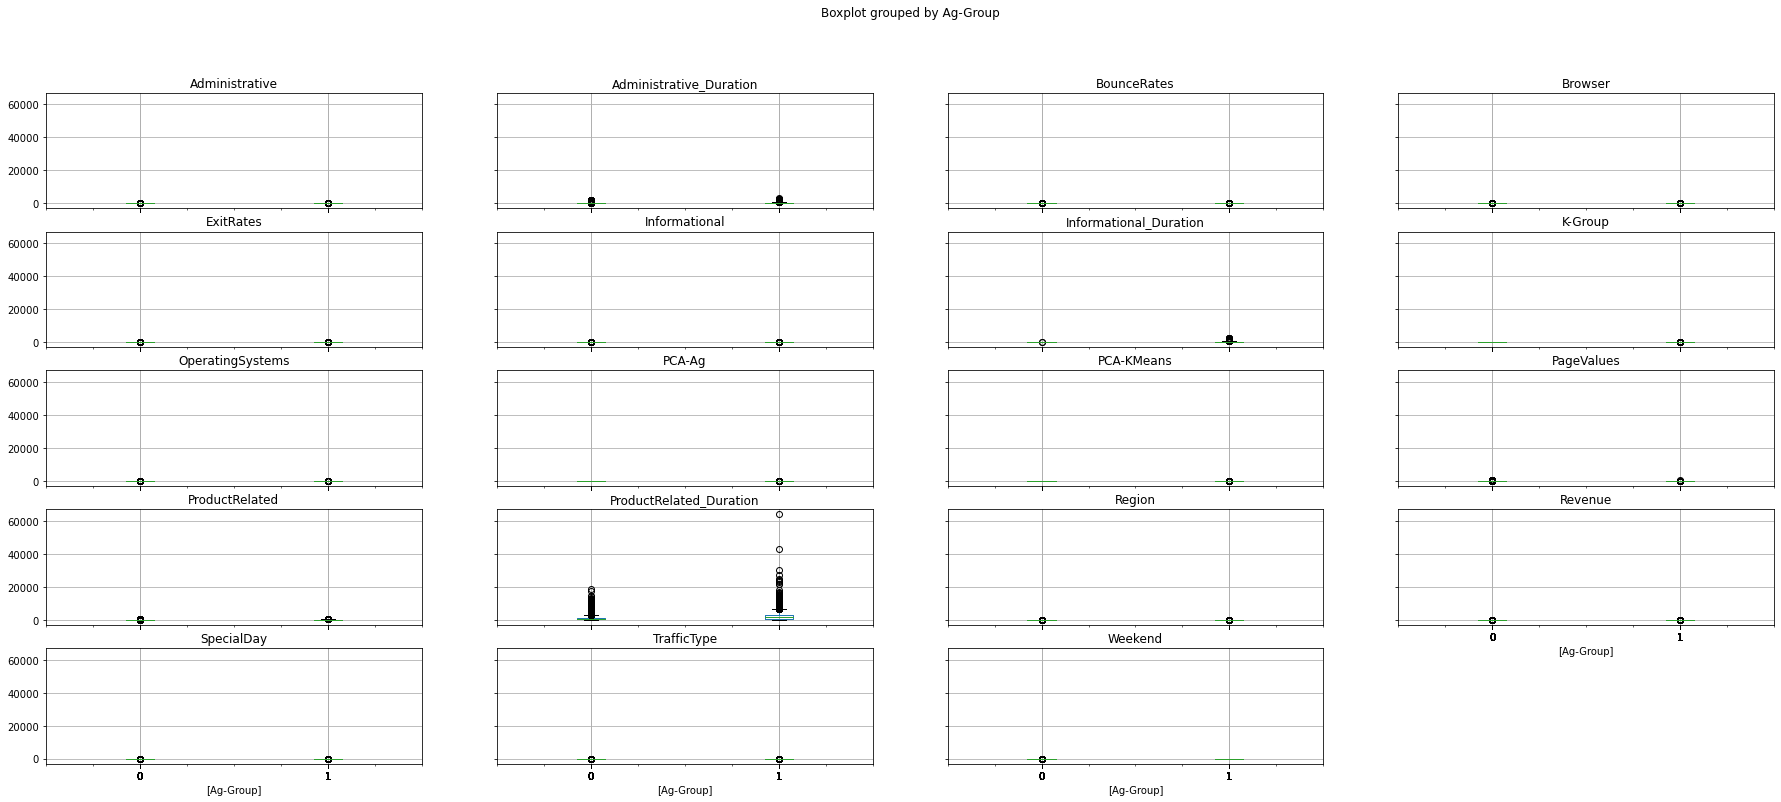

In [95]:
df.boxplot(by  = 'Ag-Group', layout = (6,4), figsize = [30,15])

In [84]:
## 2 Clusters based on Admininstrative Duration and ProductRelated Duration.One segment has higher value of both the mentioned parameters than the others.

array([[<AxesSubplot:title={'center':'Administrative'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'Administrative_Duration'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'Ag-Group'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'BounceRates'}, xlabel='[PCA-KMeans]'>],
       [<AxesSubplot:title={'center':'Browser'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'ExitRates'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'Informational'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'Informational_Duration'}, xlabel='[PCA-KMeans]'>],
       [<AxesSubplot:title={'center':'K-Group'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'OperatingSystems'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'PCA-Ag'}, xlabel='[PCA-KMeans]'>,
        <AxesSubplot:title={'center':'PageValues'}, xlabel='[PCA-KMeans]'>],
       [<AxesSubplot:title={'center':'ProductRelated'}, xla

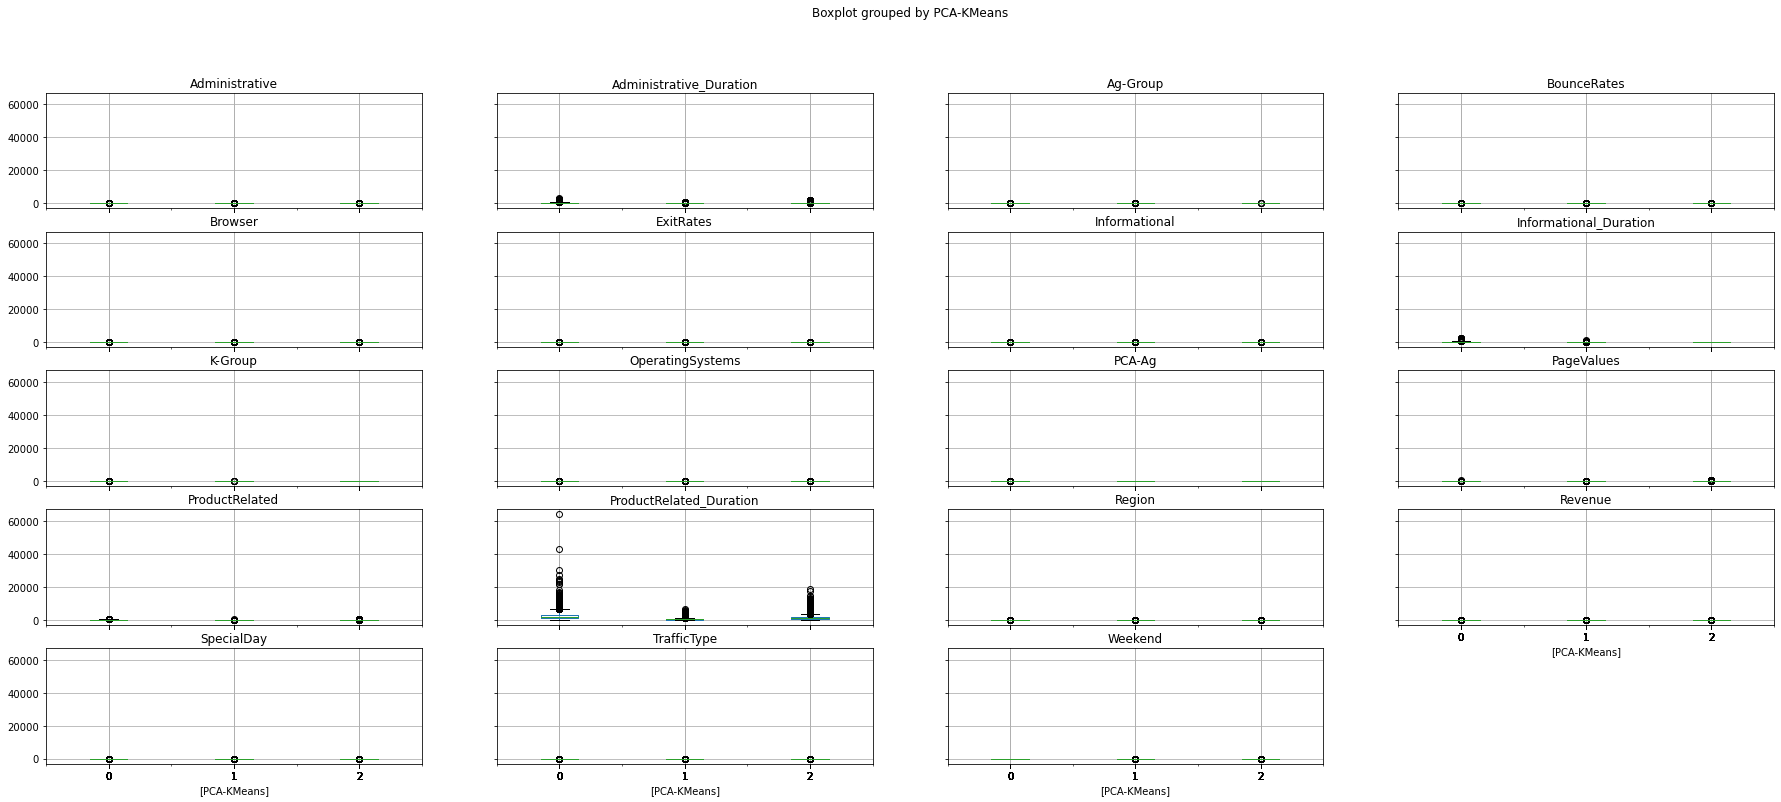

In [96]:
df.boxplot(by  = 'PCA-KMeans', layout = (6,4), figsize = [30,15])

In [97]:
# 3 Clusters formed based on amount compariosn in ProductRelated Duration mostly and some weightage on Page Values with minimal impact on Revenue as such.

array([[<AxesSubplot:title={'center':'Administrative'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'Administrative_Duration'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'Ag-Group'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'BounceRates'}, xlabel='[PCA-Ag]'>],
       [<AxesSubplot:title={'center':'Browser'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'ExitRates'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'Informational'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'Informational_Duration'}, xlabel='[PCA-Ag]'>],
       [<AxesSubplot:title={'center':'K-Group'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'OperatingSystems'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'PCA-KMeans'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title={'center':'PageValues'}, xlabel='[PCA-Ag]'>],
       [<AxesSubplot:title={'center':'ProductRelated'}, xlabel='[PCA-Ag]'>,
        <AxesSubplot:title=

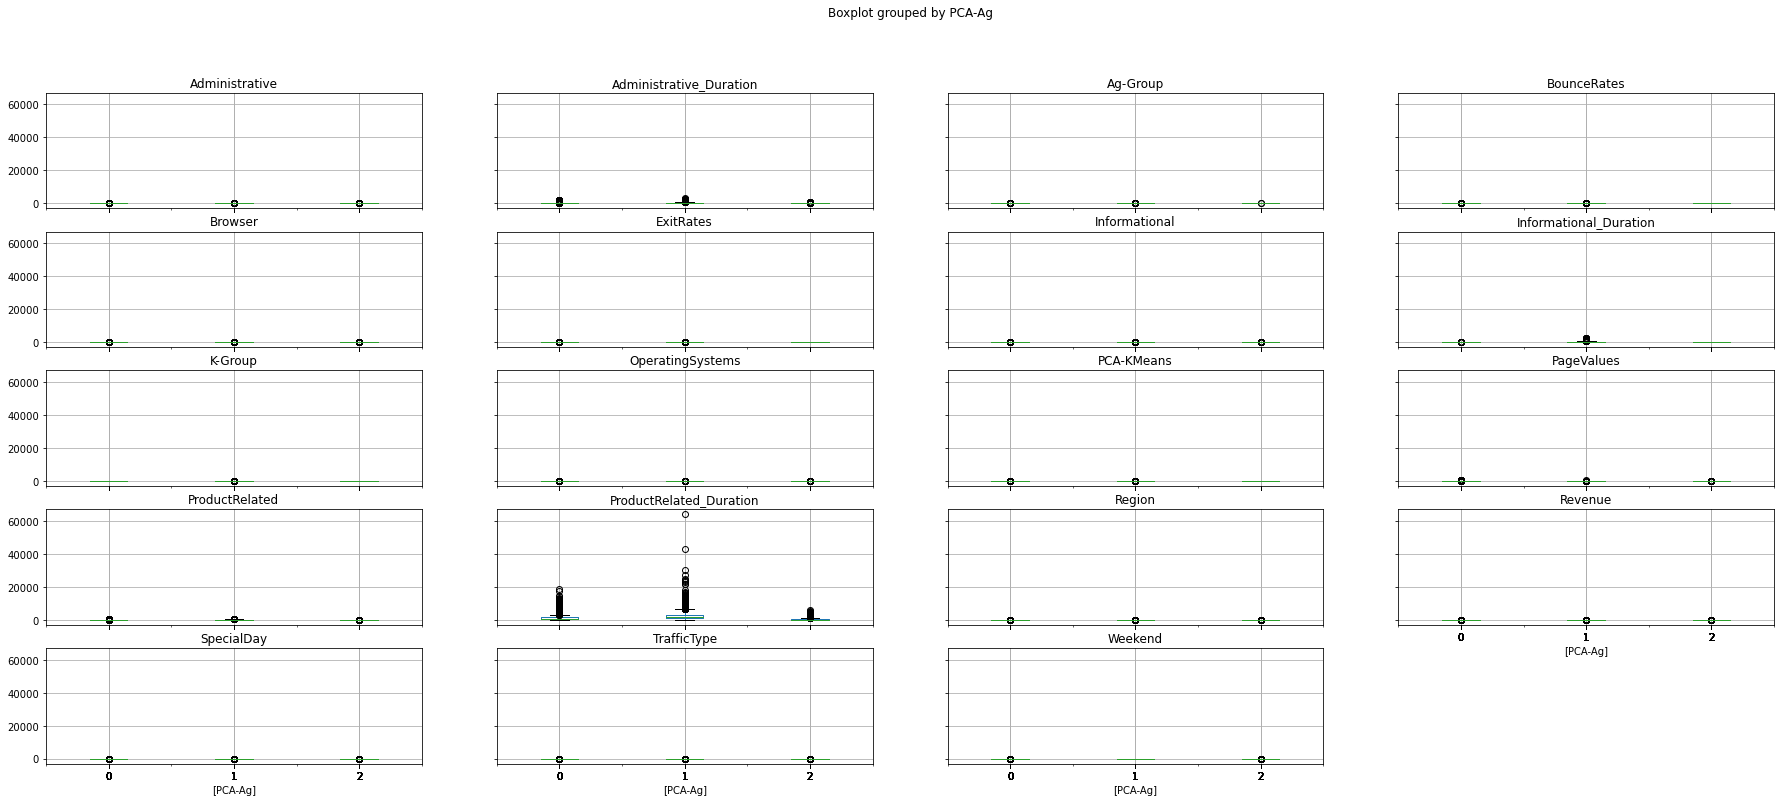

In [98]:
df.boxplot(by  = 'PCA-Ag', layout = (6,4), figsize = [30,15])

In [99]:
# 3 Clusters formed based on amount compariosn in ProductRelated Duration mostly and some weightage on Page Values with minimal impact on Revenue as such.

### As we Observe that There are either 2 or broadly 3  segments of customers based on their session time on individual product on the site, and no major groupings viable basis revnue contribution.

## We can thus recommend marketing of specific products to the specific set of customers having higher session times on those products and then can further target their Admin Session and Pages of the Products Viewed.